***
# 2.1 Categorical rhythm for Bird 22
### JX, 03/08/2022
***

    Bird22:
    LS110593.9.8.2018Araluen.WAV
    LS110640.10.1.2018Araluen.WAV
    
***

## Specify Locations

In [1]:
from butcherbird.utils.paths import DATA_DIR

In [2]:
indv = "Bird22"

In [3]:
SAVE_LOC = DATA_DIR/'interim/raw_spectrogram/butcherbird_note_df.pickle'

## Load in Data

In [4]:
import pandas as pd

In [5]:
note_df = pd.read_pickle(SAVE_LOC)

In [6]:
indv_df = note_df[note_df['indv'] == indv].reset_index()

In [7]:
indv_df.head()

,index,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,0,2.37,4.24,1.87,8,0,2.370000,2.415699,0.045699,Bird22,0,LS110593.9.8.2018Araluen_dn,"[0.0, -5.558967174674641e-06, -5.2225732263302...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,0,2.37,4.24,1.87,8,1,2.660000,2.977558,0.317558,Bird22,0,LS110593.9.8.2018Araluen_dn,"[0.0, 3.069944854750729e-05, 4.037410245845782...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,0,2.37,4.24,1.87,8,2,3.079714,3.173357,0.093643,Bird22,0,LS110593.9.8.2018Araluen_dn,"[0.0, 0.0030796517861769505, 0.008741865222086...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,0,2.37,4.24,1.87,8,3,3.260000,3.581982,0.321982,Bird22,0,LS110593.9.8.2018Araluen_dn,"[-0.0, -0.00020854328852771913, -0.00037995893...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,0,2.37,4.24,1.87,8,4,3.664275,3.718191,0.053916,Bird22,0,LS110593.9.8.2018Araluen_dn,"[-0.0, -0.0018707999847079283, -0.003892325714...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Calculate Empirical Rhythm

In [8]:
import butcherbird.rhythm as rhythm
import seaborn as sns

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:151: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
dyadic = rhythm.construct_rhythm_df(
    onsets = indv_df['note_strt'], 
    syntactic_units = indv_df['indv'], 
    expected_interval_range = [0, 1]
)

In [10]:
dyadic.head()

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
746,0.018920,0.015573,Bird22,Bird22,Bird22,0.015573,0.018920,0.034493,0.548518,0.823094,1
1275,0.049143,0.007020,Bird22,Bird22,Bird22,0.007020,0.049143,0.056163,0.875000,0.142857,2
2146,0.054145,0.019306,Bird22,Bird22,Bird22,0.019306,0.054145,0.073452,0.737159,0.356560,3
12,0.042565,0.048240,Bird22,Bird22,Bird22,0.042565,0.048240,0.090806,0.468750,0.882353,4
2634,0.055795,0.056753,Bird22,Bird22,Bird22,0.055795,0.056753,0.112549,0.495744,0.983118,5


<AxesSubplot:xlabel='ratio_roeske', ylabel='Count'>

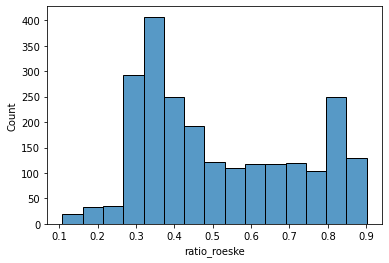

In [11]:
sns.histplot(dyadic['ratio_roeske'])

In [ ]:
dyadic_le

## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [12]:
n = 1000

In [13]:
import numpy as np
import numpy.random as random

In [14]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [15]:
df_uni = []
for i in np.arange(0, n):
    interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
    interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
    df_uni.append(interval1_uni / (interval1_uni + interval2_uni))

In [16]:
uni_ratio = np.array(df_uni).flatten()

<AxesSubplot:ylabel='Count'>

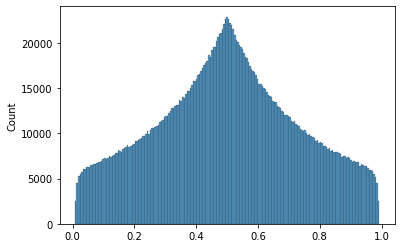

In [17]:
sns.histplot(uni_ratio)

## Calculate Shuffled IOI Rhythm
> Shuffled rhythm is calculated under the assumption that interval lengths are bootstrapped from the empirical distribution, but the consecutive order of intervals are shuffled. 

In [18]:
df_sf = []
for i in np.arange(0, n):
    interval1_sf = dyadic['intervals1'].sample(frac = 1, replace = True).values
    interval2_sf = dyadic['intervals2'].sample(frac = 1, replace = True).values
    df_sf.append(interval1_sf / (interval1_sf + interval2_sf))

In [19]:
sf_ratio = np.array(df_sf).flatten()

<AxesSubplot:ylabel='Count'>

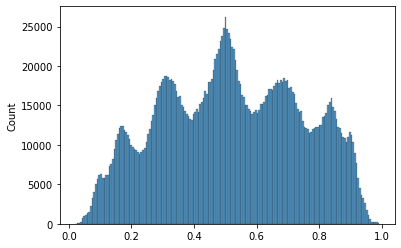

In [20]:
sns.histplot(sf_ratio)

## Calculate Shuffled Note + Gap
> Shuffled Note + Gap rhythm is calculated under the assumption that note length and inter-note gaps are independently shuffled.

In [21]:
import numpy.random as random

In [22]:
# find all gaps and their positions
grand_gaps = []

for phrase_nb in np.unique(indv_df['phrase_nb']):
    ## pull out each phrase
    phrase = indv_df[indv_df['phrase_nb'] == phrase_nb]

        ## find all internote gaps
    gaps = phrase['note_strt'][1:].values - phrase['note_end'][:-1].values
    grand_gaps.append(gaps)
    
grand_gaps = np.hstack(grand_gaps)
grand_gaps = grand_gaps[grand_gaps < 10] ## gaps that are more than 10 seconds long are noise

In [23]:
df_lg = []

for i in np.arange(0, n):
    ## randomly shuffle gaps
    random.shuffle(grand_gaps)
    ## add to randomly shuffled lengths
    shuffled_lg = grand_gaps + indv_df['note_len'].sample(n = len(grand_gaps), replace = True).values
    
    shuffled_lg_i1 = shuffled_lg[:-1]
    shuffled_lg_i2 = shuffled_lg[1:]
    
    df_lg.append(shuffled_lg_i1 / (shuffled_lg_i1 + shuffled_lg_i2))

In [24]:
lg_ratio = np.hstack(df_lg)

<AxesSubplot:ylabel='Count'>

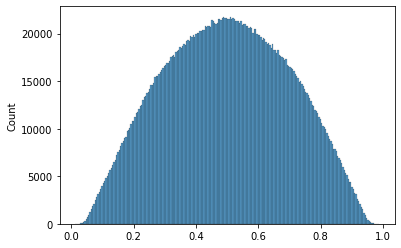

In [25]:
sns.histplot(lg_ratio)

## Draw Figure

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR

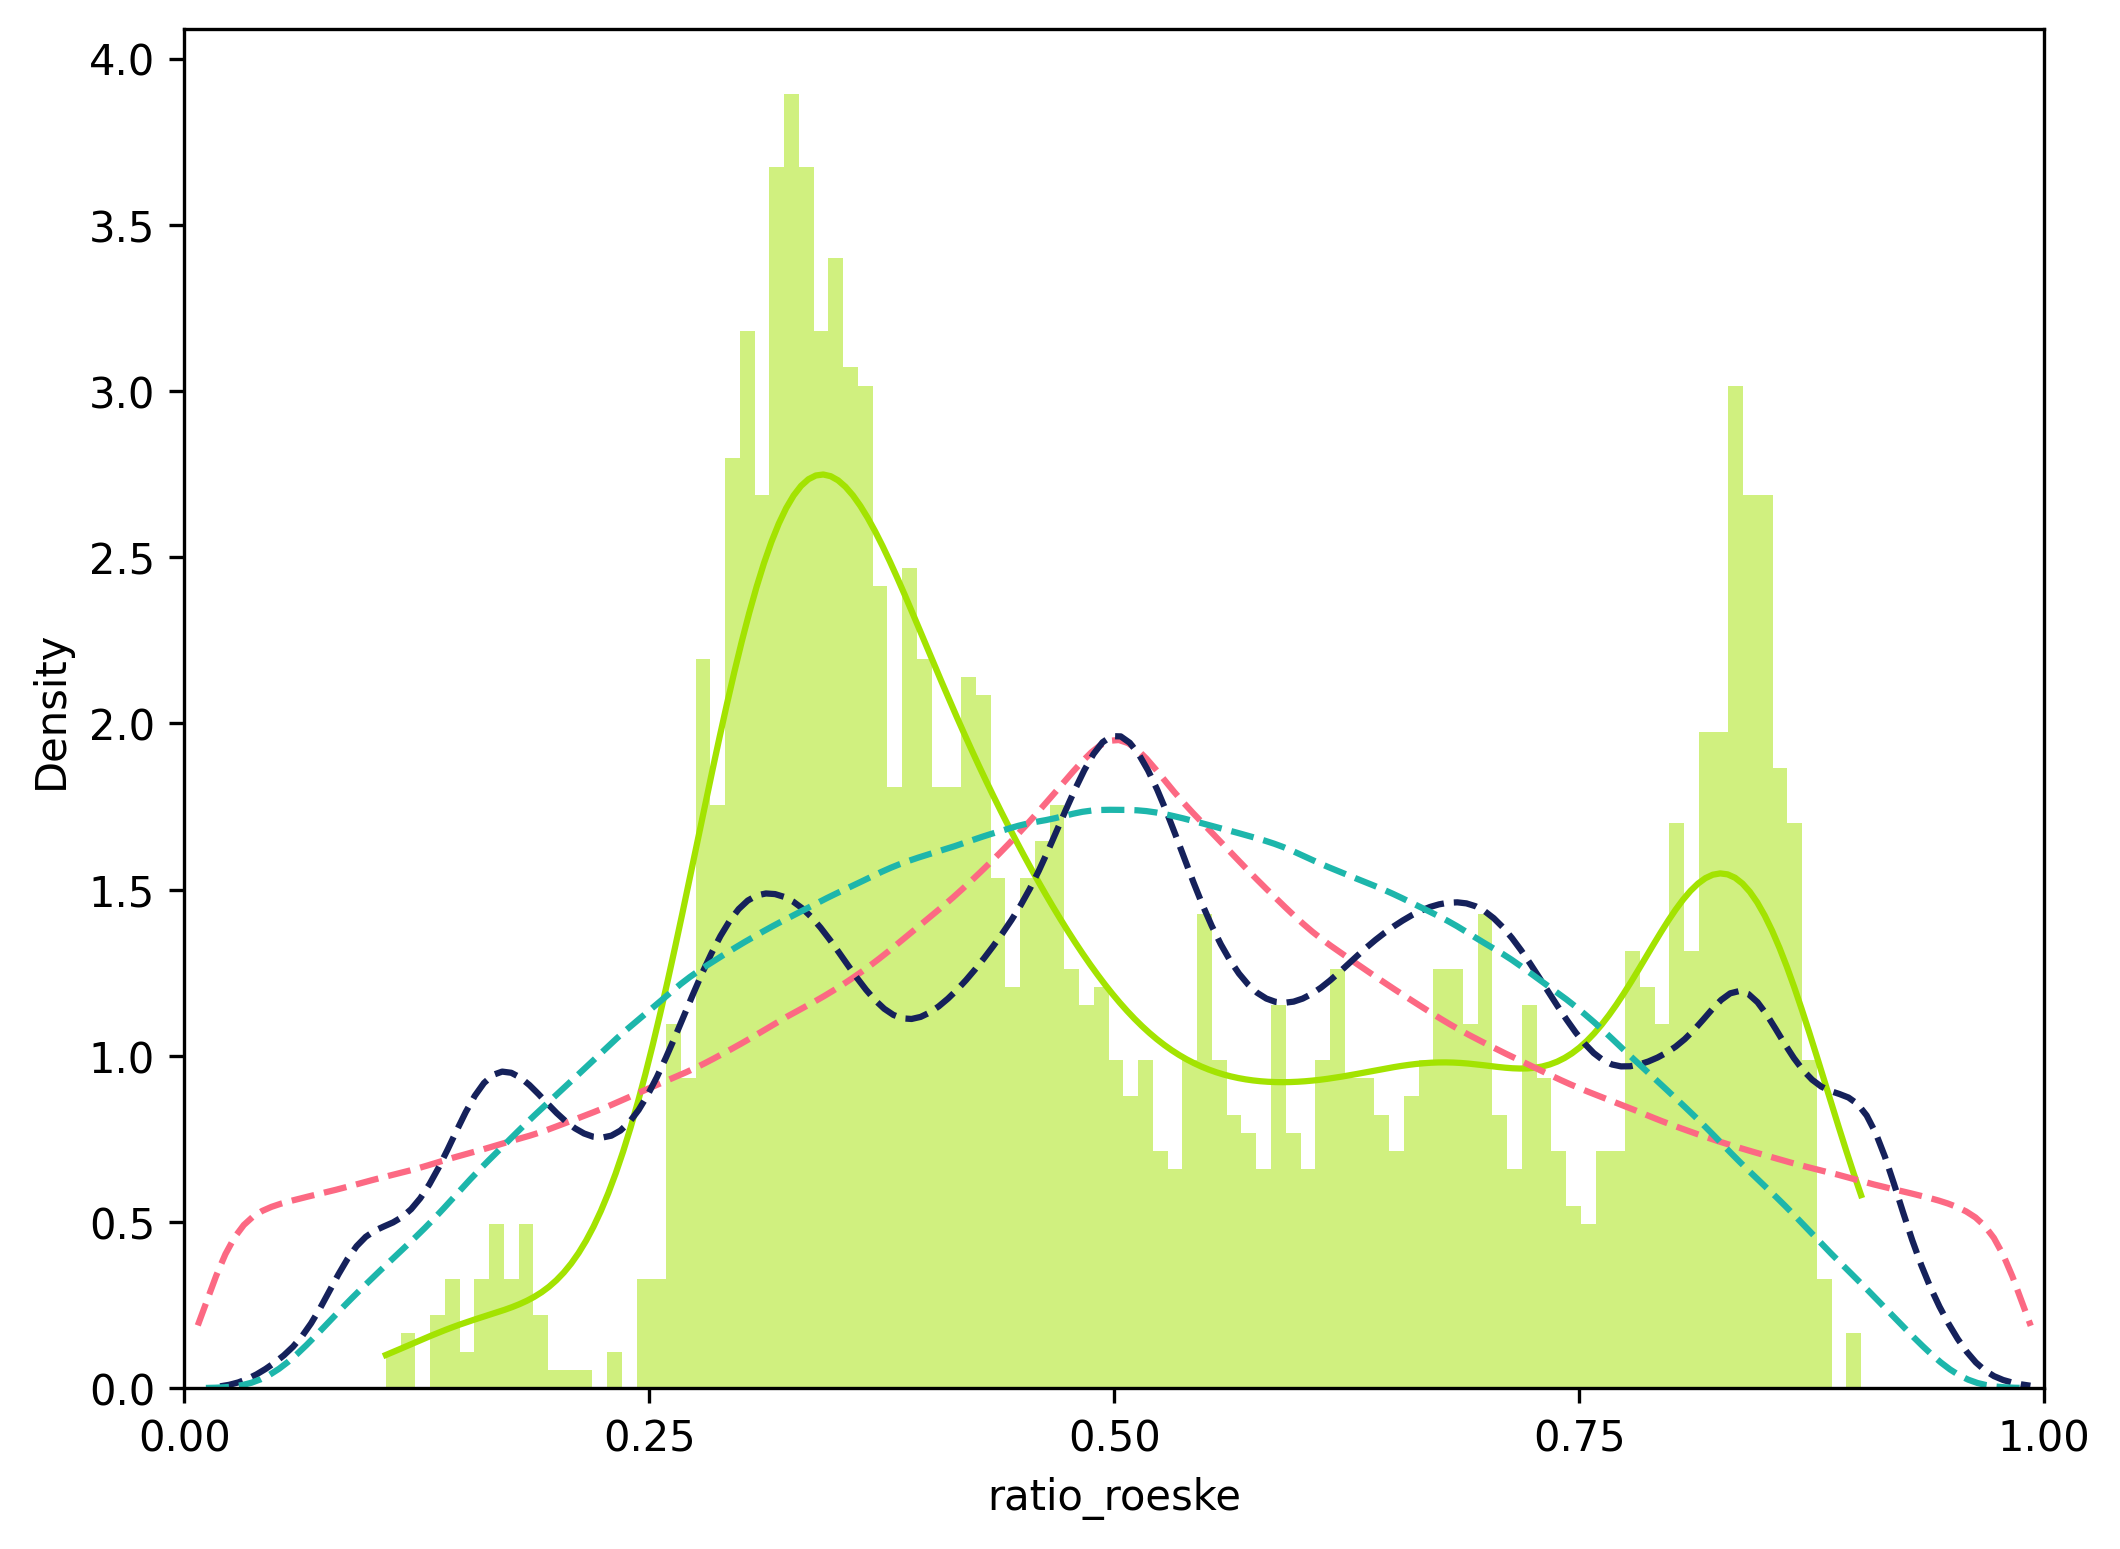

In [27]:
figure(figsize = (8, 6), dpi = 300)

plt.rcParams['patch.edgecolor'] = 'none'

fig = sns.histplot(
    x = dyadic['ratio_roeske'],
    bins = 100,
    stat = 'density',
    color = '#A3E301',
    fill = '#A3E301',
    kde = True,
)

uni = sns.histplot(
    x = uni_ratio,
    stat = 'density',
    alpha = 0,
    color = '#FC6983',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

sf = sns.histplot(
    x = sf_ratio,
    stat = 'density',
    alpha = 0,
    color = '#15215B',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

lg = sns.histplot(
    x = lg_ratio,
    stat = 'density',
    alpha = 0,
    color = '#1DB6AB',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'categorical_rhythm_' + indv + '.svg'
plt.savefig(FIGURE_DIR/figname)

## Calculate Hopkins Statistics and confidence intervals

In [28]:
from butcherbird.rhythm import hopkins
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed

In [29]:
h_iterations = 100
shuffle_iterations = 100
n_jobs = 36

In [30]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [31]:
## empirical
SDoH = []

for i in tqdm(range(0, h_iterations)):
    SDoH.append(hopkins(dyadic[['ratio_roeske']]))
    
## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH)

  0%|          | 0/100 [00:00<?, ?it/s]

(0.8512468591434487, 0.8468807898175689, 0.8556129284693285)

In [32]:
## uni
SDoH_uni = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_uni = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_uni)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_uni)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.7017295989354124, 0.7004490207693472, 0.7030101771014776)

In [33]:
## shuffle
SDoH_shuffle = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_shuffle = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_sf)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_shuffle)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.7762307469926234, 0.7734611821698947, 0.7790003118153521)

In [34]:
## lg shuffle
SDoH_lg = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_lg = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_lg)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_lg)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.7985787340786585, 0.7960144224308002, 0.8011430457265168)

## Timescale Estimation

Timescale is estimated as mean inter-onset interval

In [35]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [36]:
sequential_note = dyadic.sort_index()
sequential_note

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
0,0.290000,0.419714,Bird22,Bird22,Bird22,0.290000,0.419714,0.709714,0.408615,0.690946,1790
1,0.419714,0.180286,Bird22,Bird22,Bird22,0.180286,0.419714,0.600000,0.699524,0.429544,1476
2,0.180286,0.404275,Bird22,Bird22,Bird22,0.180286,0.404275,0.584561,0.308413,0.445949,1389
3,0.404275,0.075725,Bird22,Bird22,Bird22,0.075725,0.404275,0.480000,0.842239,0.187311,944
4,0.075725,0.196397,Bird22,Bird22,Bird22,0.075725,0.196397,0.272123,0.278276,0.385572,509
...,...,...,...,...,...,...,...,...,...,...,...
3560,0.350000,0.060540,Bird22,Bird22,Bird22,0.060540,0.350000,0.410540,0.852536,0.172971,701
3561,0.060540,0.069996,Bird22,Bird22,Bird22,0.060540,0.069996,0.130536,0.463779,0.864904,46
3564,0.480513,0.355655,Bird22,Bird22,Bird22,0.355655,0.480513,0.836168,0.574661,0.740157,1949
3565,0.355655,0.696176,Bird22,Bird22,Bird22,0.355655,0.696176,1.051831,0.338129,0.510870,2117


In [37]:
n_IOI = list(sequential_note['intervals1'].values)
n_IOI.append(sequential_note['intervals2'].values[-1])

In [38]:
mean_confidence_interval(n_IOI, confidence=0.95)

(0.2830544122433199, 0.27592883354442904, 0.29017999094221075)